In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
from nltk.tokenize import word_tokenize 
from collections import Counter
from nltk.tokenize import word_tokenize 
from nltk.tokenize import sent_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import regexp_tokenize
import re
from sklearn.model_selection import train_test_split
import seaborn as sns


In [2]:
movies = pd.read_csv('Data/movies_df.csv')
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9863 entries, 0 to 9862
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9863 non-null   int64  
 1   Unnamed: 0.1       9863 non-null   int64  
 2   id                 9863 non-null   int64  
 3   original_language  9863 non-null   object 
 4   original_title     9863 non-null   object 
 5   popularity         9863 non-null   float64
 6   release_date       9839 non-null   object 
 7   vote_average       9863 non-null   float64
 8   vote_count         9863 non-null   int64  
 9   genre              9863 non-null   object 
 10  overview           9863 non-null   object 
 11  revenue            9863 non-null   int64  
 12  runtime            9858 non-null   float64
 13  tagline            7077 non-null   object 
 14  summary_length     9863 non-null   int64  
 15  Unnamed: 15        9863 non-null   int64  
 16  Action             9863 

In [3]:
#Using this code to turn the genre from strings into list 
movie_genre = [i.strip('[]').split(",") for i in movies.genre]
for movie in (movie_genre):
    for number, genres in enumerate(movie):
        movie[number] = genres.strip("' '")
movies['genre'] =  movie_genre

In [4]:
movie_len = []
for i in range(0, len(movies)):
    movie_len.append(len(movies.overview[i]))
movies['summary_length'] = movie_len

In [5]:
genre_list = movies.genre
genre_counting_list =[]
for movie in genre_list:
    [genre_counting_list.append(genre) for genre in movie]
movie_counter = Counter(genre_counting_list)
del movie_counter['']

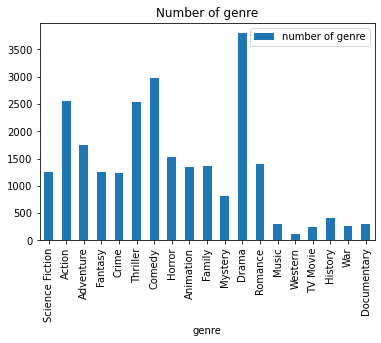

In [6]:
genre_df = pd.DataFrame({'genre': movie_counter.keys(),
                   'number of genre': movie_counter.values()})
genre_df.set_index('genre', inplace = True)
genre_df.plot(kind='bar', y='number of genre')
plt.title('Number of genre')
plt.show()

In [7]:
genre_len = defaultdict(list)
average_len =[]
for e,i in enumerate(genre_df.index):
    for number, genre in enumerate(movies.genre):
        if i in genre:
            genre_len[i].append(movies.summary_length[number])
     

In [8]:
average_len = defaultdict(list)
for i in genre_len.keys():
    average_len[i].append(np.mean(genre_len[i]))
    average_len[i] = average_len[i][0]
average_len

defaultdict(list,
            {'Science Fiction': 295.2028639618138,
             'Action': 294.7180892717306,
             'Adventure': 303.47102696500286,
             'Fantasy': 309.6951316839585,
             'Crime': 269.41362530413625,
             'Thriller': 269.4889763779528,
             'Comedy': 279.9403685092127,
             'Horror': 269.1718954248366,
             'Animation': 333.1107828655835,
             'Family': 302.5341660543718,
             'Mystery': 269.3142857142857,
             'Drama': 273.9288537549407,
             'Romance': 288.1359430604982,
             'Music': 269.9799331103679,
             'Western': 264.1507936507937,
             'TV Movie': 293.75619834710744,
             'History': 276.4714640198511,
             'War': 287.7720588235294,
             'Documentary': 282.5821917808219})

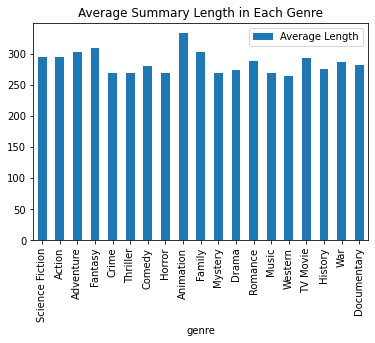

In [9]:
average_len
average_genre_df = pd.DataFrame({'genre': average_len.keys(),
                   'Average Length': average_len.values()})
average_genre_df.set_index('genre', inplace = True)
average_genre_df.plot(kind='bar', y='Average Length')
plt.title('Average Summary Length in Each Genre')
plt.show()

In [10]:
genre_df= movies['genre'].str.join('|').str.get_dummies()

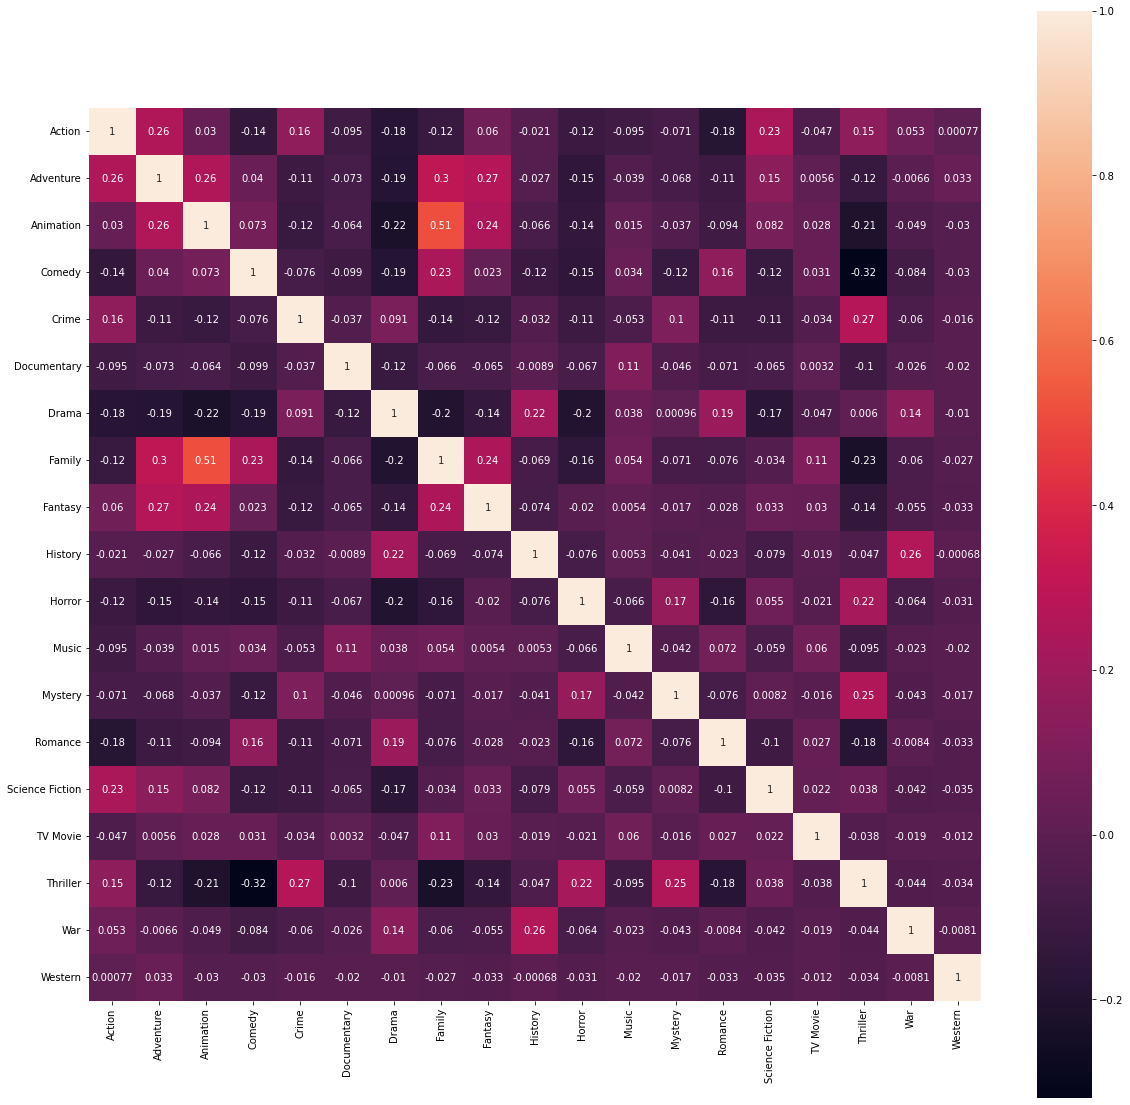

In [11]:
fig, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(genre_df.corr(), square=True, annot = True)

In [12]:
from nltk.corpus import stopwords
import string
stop = set(stopwords.words('english') + list(string.punctuation)+list(str.maketrans("'","`", "'s")))

In [13]:
movie_summary = defaultdict(list)
for number,summary in enumerate(movies.overview):
    movie_summary[movies.original_title[number]].append([i for i in word_tokenize(summary) if i not in stop])
for number,summary in enumerate(movies.overview):
    movie_summary[movies.original_title[number]] = movie_summary[movies.original_title[number]][0] 

In [14]:
movies_df = movies.set_index('original_title').iloc[:,2:]

In [27]:
def genre_sort(x):
    empty = []
    for i,e in enumerate(movies_df[movies_df[x] == 1].overview):
        for word in  word_tokenize(movies_df[movies_df[x] == 1].overview[i]):
            if word.lower() not in stop and len(word) > 2:
                empty.append(word)
    return(empty)

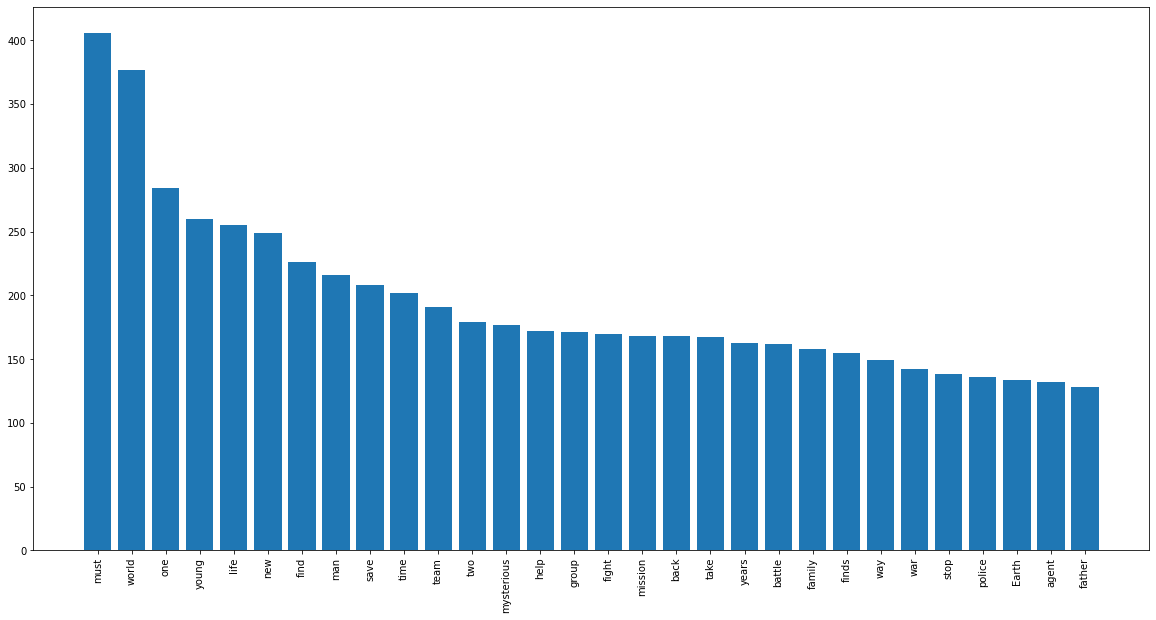

In [28]:
Action_list = Counter(genre_sort('Action')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Action_list))
plt.xticks(rotation = 90) 
plt.show()

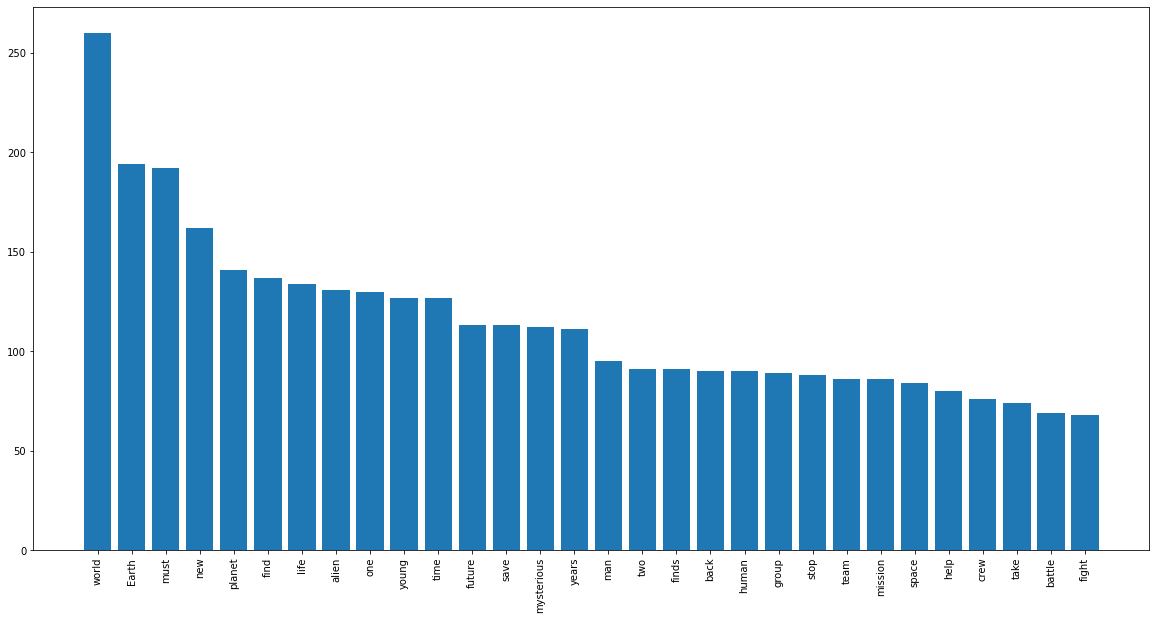

In [29]:
Science_Fiction = Counter(genre_sort('Science Fiction')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Science_Fiction))
plt.xticks(rotation = 90) 
plt.show()

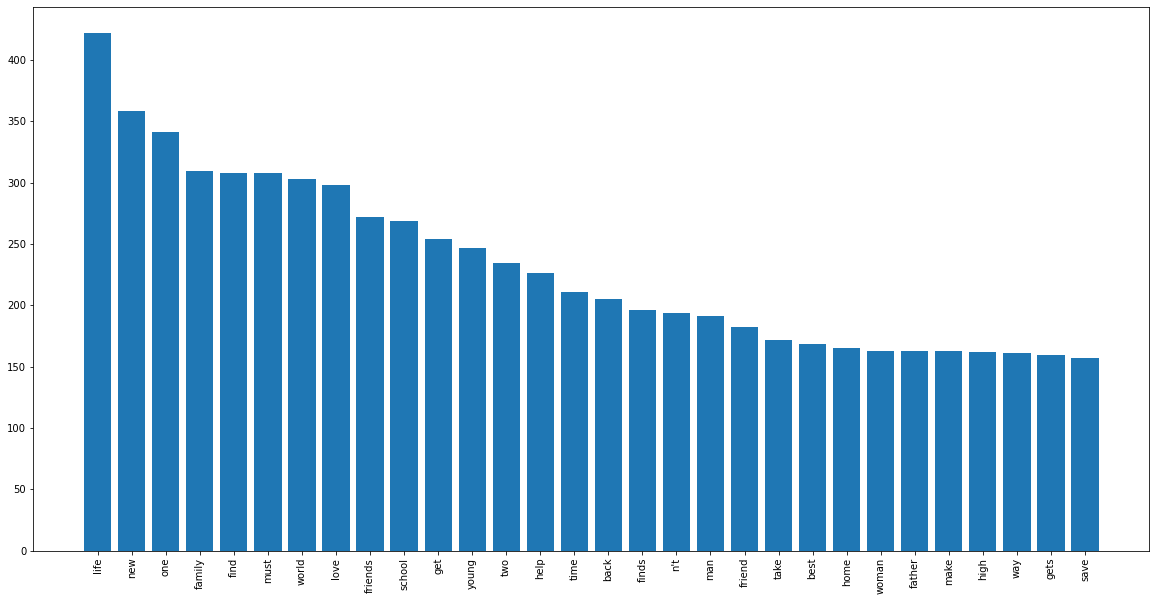

In [30]:
Comedy = Counter(genre_sort('Comedy')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Comedy))
plt.xticks(rotation = 90) 
plt.show()

In [19]:
def movie_summary(x):
    empty = []
    for summary in movies_df[movies_df[x] == 1].overview:
        empty.append(summary)
    return(empty)
    

In [62]:
from gensim.models.tfidfmodel import TfidfModel
from gensim.corpora.dictionary import Dictionary
tokenized_doc = [word_tokenize(summary.lower()) for summary in movie_summary('Action')] 
dictionary = Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_doc]
id = dictionary.token2id.get('movies')

In [72]:
import itertools
doc = corpus[4]
bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)
for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count
# Create a sorted list from the defaultdict: sorted_word_count 
sorted_word_count = sorted(total_word_count.items(), key=lambda w: w[1], reverse=True) 

# Print the top 5 words across all documents alongside the count
for word_id, word_count in sorted_word_count[:5]:
    print(dictionary.get(word_id), word_count)

a 2
called 2
. 1
in 1
an 1
the 8175
, 6571
. 5570
a 5333
to 4349


In [75]:
for word_id, word_count in sorted_word_count:
    print(dictionary.get(word_id), word_count)

the 8175
, 6571
. 5570
a 5333
to 4349
of 3636
and 3532
in 2156
his 2038
is 1818
with 1238
's 1125
an 1065
he 1037
on 991
for 931
by 834
that 826
as 797
who 761
when 746
from 731
their 707
they 563
her 562
but 517
has 505
are 496
after 481
into 456
him 443
world 432
it 432
must 408
out 346
new 337
one 336
up 336
at 324
will 278
only 273
be 270
young 266
against 262
all 259
life 256
man 253
have 249
them 246
this 242
'' 236
`` 235
find 226
two 219
war 214
save 209
time 207
she 206
’ 202
team 201
city 199
: 189
can 185
mysterious 179
battle 179
while 177
down 174
where 173
help 172
back 172
now 172
group 171
fight 171
) 171
years 170
( 170
mission 169
take 167
earth 166
agent 161
family 158
himself 156
finds 155
police 155
been 152
before 152
was 150
s 149
way 149
not 145
which 141
stop 139
most 135
father 132
death 131
former 131
forces 128
evil 127
- 126
over 122
get 122
no 121
own 121
' 121
become 121
son 121
secret 120
during 120
becomes 120
other 120
more 119
gang 115
dangerous 114
s

monstrous 9
pacific 9
espionage 9
regain 9
aboard 9
crosses 9
innocence 9
mystical 9
snow 9
volcanic 9
thor 9
mom 9
unleash 9
smuggling 9
enforcer 9
irish 9
superhuman 9
transferred 9
unstoppable 9
jackie 9
witnesses 9
strikes 9
senator 9
exchange 9
distant 9
staff 9
coma 9
vegeta 9
assault 9
tower 9
lantern 9
lie 9
biker 9
price 9
began 9
adaptation 9
jane 9
emergency 9
successfully 9
lt. 9
nazis 9
worker 9
merry 9
eternal 9
surprise 9
survivor 9
infamous 9
arrival 9
food 9
gather 9
knights 9
po 9
wo 9
colonel 9
futuristic 9
complex 9
problem 9
newly 9
winds 9
nightmare 9
energy 9
opportunity 9
success 9
ape 9
15 9
loss 9
resurrected 9
texas 9
testify 9
trial 9
villagers 9
daniel 9
failed 9
appeared 9
ford 9
predator 9
stake 9
obsessed 9
bullets 9
residents 9
clock 9
eccentric 9
inadvertently 9
grail 9
nearby 9
mcclane 9
everyday 9
overrun 9
abducted 9
discovering 9
solo 9
skill 9
count 9
imperial 9
attention 9
indian 9
tyrant 9
ethan 9
lands 9
convinces 9
england 9
forbidden 9
priest

shion 4
ex-cop 4
jeopardy 4
attitude 4
st. 4
issues 4
agree 4
passion 4
deals 4
triangle 4
amidst 4
mount 4
renowned 4
requires 4
escalate 4
tensions 4
weary 4
pandemic 4
trusted 4
wait 4
assemble 4
accept 4
currently 4
spanning 4
tried 4
my 4
nobody 4
feared 4
subsequently 4
shaw 4
emotion 4
rivals 4
thrill-seeking 4
celebrated 4
nightclub 4
aware 4
dwarves 4
majestic 4
peninsula 4
canada 4
uneasy 4
honest 4
blows 4
diplomatic 4
talk 4
cobra 4
plunging 4
polar 4
misty 4
rebuild 4
ex-partner 4
vehicles 4
nations 4
lurking 4
ragtag 4
trainee 4
untested 4
acts 4
freak 4
shan 4
trek 4
teaches 4
battle-hardened 4
commands 4
germany 4
tank 4
konoha 4
newborn 4
imprisonment 4
turtle 4
receiving 4
slayer 4
core 4
doomed 4
radiation 4
setting 4
punishment 4
determine 4
minions 4
strongest 4
dominance 4
helpless 4
alejandro 4
antics 4
linked 4
damon 4
mills 4
shattered 4
trials 4
surgeon 4
bottom 4
impressive 4
lifestyle 4
savior 4
presidential 4
collapse 4
clean 4
waging 4
blockbuster 4
tekken

succumbs 3
warn 3
freddy 3
wins 3
lure 3
russians 3
andrew 3
kidney 3
conquered 3
infantry 3
progresses 3
giving 3
covers 3
nightwing 3
48 3
munich 3
forges 3
intended 3
attracts 3
painter 3
tiny 3
wanderer 3
eager 3
meant 3
conversation 3
numerous 3
priestess 3
2019 3
gally 3
possessing 3
terry 3
americans 3
casualties 3
delta 3
wildlife 3
obtained 3
loot 3
trish 3
underbelly 3
lawyer 3
deranged 3
explodes 3
incidents 3
gates 3
adam 3
injustice 3
ominous 3
cosmo 3
feel 3
shiryū 3
software 3
8 3
specializes 3
bandit 3
vega 3
scheming 3
honour 3
plenty 3
wreck 3
fumito 3
nanahara 3
400 3
batgirl 3
sawa 3
elric 3
moonlights 3
stash 3
mammoth 3
hijacking 3
bliss 3
council 3
unpredictable 3
501st 3
towns 3
booth 3
riley 3
200 3
laura 3
well-known 3
inevitably 3
egg 3
realized 3
chuckie 3
totalitarian 3
wire 3
gunned 3
intruders 3
corporal 3
muster 3
spirals 3
gary 3
library 3
treats 3
salander 3
sweden 3
smuggle 3
heavens 3
ashore 3
strapped 3
cherry 3
leg 3
witnessed 3
gunmen 3
sanchez 3


tuffles 2
illustrious 2
fast-talking 2
gibson 2
finnish 2
vital 2
cute 2
stead 2
ears 2
fresh 2
graboid 2
milk 2
employers 2
travelling 2
apple 2
attracted 2
christ 2
discord 2
jan 2
orion 2
shun 2
calif. 2
spyder 2
catacombs 2
collectors 2
enchanted 2
folklore 2
townsfolk 2
neon 2
greatly 2
blocked 2
restoring 2
routes 2
technological 2
decidedly 2
phillips 2
riddler 2
anderton 2
budding 2
empress 2
harassment 2
overdue 2
stooges 2
walled 2
action-hero 2
stoner 2
miner 2
inc 2
villainy 2
revelation 2
compassion 2
cybernetic 2
mcginnis 2
mutate 2
purposefully 2
reports 2
somebody 2
somali 2
19 2
jr 2
watchful 2
launched 2
ryder 2
long-buried 2
roaring 2
bean 2
mess 2
bosses 2
arch-nemesis 2
deadlier 2
agility 2
enhance 2
engages 2
kicking 2
bahamas 2
pennsylvania 2
croker 2
upset 2
chas 2
decade 2
occult 2
responds 2
re-telling 2
inspiring 2
resolves 2
yuan 2
lesson 2
diplomat 2
plants 2
embedded 2
franklin 2
stashed 2
heihachi 2
hiking 2
mistakes 2
brainiac 2
zorro 2
links 2
informed 

bane 1
abby 1
enthusiasts 1
holtzmann 1
jillian 1
patty 1
tolan 1
glamorous 1
hinging 1
shifting 1
fearing 1
forceful 1
unchecked 1
gimli 1
isengard 1
legolas 1
orc-captured 1
orthanc 1
pippin 1
saruman 1
trekking 1
'spice 1
10,191 1
arrakis—the 1
melange 1
space-travel 1
damnation 1
davy 1
accuracy 1
comrades—to 1
mission—protect 1
pinpoint 1
tours 1
collections 1
creeper 1
cuevas 1
ranking 1
scorch 1
vastly 1
thanksgiving 1
fisher 1
multimillion-dollar 1
near-impossible 1
taunting 1
1-5 1
kimetsu 1
recap 1
yaiba 1
deckard 1
protectees 1
sonia 1
unlicensed 1
co-founded 1
individuals 1
kill… 1
knife-throwing 1
naïve 1
performer 1
relegating 1
sprayed 1
grudge 1
sociopath 1
flipped 1
hyenas 1
incites 1
kenya 1
leopard 1
-find 1
aisha 1
bolivian 1
embroiling 1
heavily-guarded 1
instigated 1
jensen 1
pooch 1
presumed 1
roque 1
team-clay 1
dynasty… 1
strife 1
re-emergence 1
world-destroyer 1
danvers 1
adolescents 1
bohemian 1
freshmen 1
kindred 1
mature 1
overgrown 1
twice 1
adjuster 1
cos

unlikeliest 1
employees 1
carlos 1
damn 1
downtown 1
ridiculous 1
serento 1
sol 1
taco 1
towing 1
vin 1
hooligan 1
'silver 1
neutralize 1
reserves 1
resilience 1
handover 1
pearce 1
interfere 1
substitute 1
batoru 1
breakfast 1
saido 1
sani 1
shippuden 1
adulthood 1
conjured 1
demon—hellboy—has 1
2032 1
parole 1
utopia 1
reconstruct 1
spy—but 1
swiss 1
world-class 1
chupacabras 1
ghostbusters 1
coin 1
vesemir 1
witcher 1
anteiku 1
anti-ghoul 1
flavour 1
ghouls 1
gourmet 1
half-ghoul 1
savour 1
tsukiyama 1
now-adult 1
steering 1
t-1000 1
t-x 1
whistle 1
conclude 1
iguana 1
irradiate 1
niko 1
oversized 1
reproduces 1
spawn 1
tatopoulos 1
fjord 1
geiranger 1
scenic 1
theorised 1
acknowledge 1
alleys 1
birthright 1
vortigern 1
biographical 1
lauda 1
motor-racing 1
niki 1
1204. 1
aristocracy 1
baglers 1
birkebeiners 1
church— 1
håkon 1
men— 1
—supporters 1
—the 1
infraction 1
loser 1
scooter 1
contacted 1
contrived 1
montgomery 1
frame 1
help—to 1
luthors 1
oncoming 1
stave 1
unite—and 1
pi

piloting 1
retitled 1
disgrace 1
edwards 1
philips 1
puppets 1
akira 1
examination 1
folly 1
late-life 1
lear 1
masterpiece 1
profound 1
reimagines 1
singular 1
sixteenth-century 1
veteran-turned-mercenary 1
avery 1
bureaucracy 1
harmful 1
antagonism 1
expels 1
quake 1
tapped 1
temblor 1
half-demon 1
hyoga 1
kaede 1
myoga 1
traveled 1
scooby-doo 1
cheryl 1
emcee 1
13. 1
pleasant 1
cross-border 1
gloria 1
inventiveness 1
bogomil 1
heartless 1
kingpin—and 1
sunshine 1
dynamic 1
nice 1
oblivious 1
periodically 1
slightest 1
elimination 1
quick-draw 1
blomkamp 1
must-see 1
odsts 1
post-invasion 1
shorts 1
standalone 1
stripe 1
wind 1
braces 1
20-year-old 1
atheist 1
bride—a 1
inhabiting 1
jericho 1
catalina 1
2116—the 1
achieves 1
tsunemori 1
unmanned 1
boxcar 1
c-119 1
gobi 1
mongolia 1
unproductive 1
fakes 1
painful 1
water-boarded 1
darkrai 1
dialga 1
distort 1
erupt 1
palkia 1
frontiersman 1
huron 1
mohican 1
mohicans 1
trappers 1
heels 1
hijacker 1
motorcade 1
1943 1
freaks 1
confirmi

former-champion 1
indochina 1
labor 1
war-criminals 1
100,000 1
alternatives 1
amount 1
depending 1
dm 1
disastrously 1
embarrassment 1
funny 1
pleads 1
rolled 1
panamanian 1
latrell 1
orin 1
reassigned 1
ruffles 1
refuse 1
spencer 1
banish 1
fatherly 1
kindergarten 1
liberal 1
politically 1
1954 1
1956 1
adding 1
featured 1
raymond 1
re-titled 1
restores 1
sequels 1
tone 1
clouded 1
seduce 1
confirms 1
shootings 1
1000 1
barde 1
chieftain 1
clears 1
engulfed 1
norse 1
court-martialed 1
rallies 1
1215 1
barring 1
carta 1
despised 1
momentous 1
pledging 1
reneged 1
rochester 1
seminal 1
upheld 1
anti-manchu 1
manchu 1
sai 1
superintendent 1
compilation 1
pontius 1
skits 1
'monican 1
bregna 1
congress 1
flux 1
æon 1
1983 1
muscles 1
reputations 1
winners 1
drej 1
claws 1
hayami 1
natsuko 1
seiji 1
sprees 1
game—the 1
adapted 1
kotona 1
ninokuni 1
peers 1
yuu 1
anton 1
govern 1
outrage 1
signed 1
highlanders 1
5-star 1
brilliantly 1
dolph 1
lundgren 1
searing 1
sewers 1
backward 1
confusi

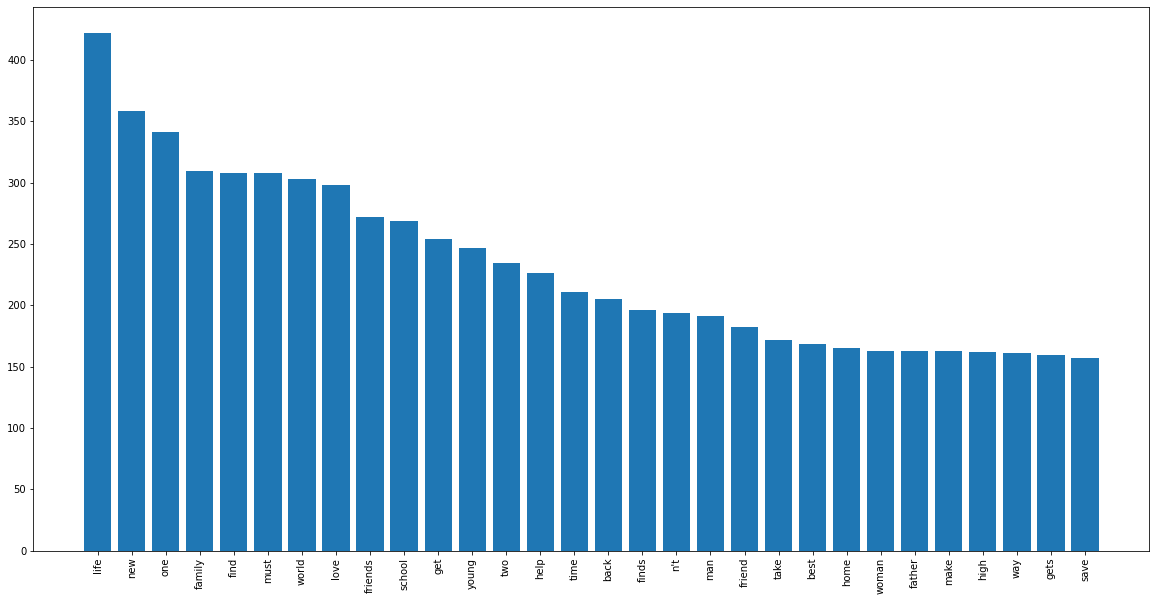

In [76]:
Science_Fiction = Counter(genre_sort('Comedy')).most_common(30)
fig, ax = plt.subplots(figsize = (20,10))
plt.bar(*zip(*Science_Fiction))
plt.xticks(rotation = 90) 
plt.show()

In [77]:
genre_df

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
9859,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
9860,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
9861,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
